In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
plt.style.use('dark_background')

In [94]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file.csv')

In [95]:
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [97]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [98]:
np.round((df.isnull().sum().values/len(df))*100,2)

array([ 0.  ,  0.  ,  0.  , 30.66,  9.22,  6.51,  0.13,  0.09,  0.  ,
        0.  ,  0.  ])

In [99]:
df.dropna(how='all',inplace=True)

In [100]:
df.dropna(subset=['Release_Date','Rating'],axis=0,inplace=True)

In [101]:
df[df.duplicated()]#.sum

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [102]:
df.drop_duplicates(inplace=True)

In [103]:
# Convert 'Release_Date' to datetime, handling potential inconsistencies in formatting by stripping leading/trailing spaces
df['Release_Date'] = pd.to_datetime(df['Release_Date'].str.strip(), format='%B %d, %Y', errors='coerce')

In [104]:
df['year']=df['Release_Date'].dt.year

In [105]:
df['month']=df['Release_Date'].dt.month_name()

In [106]:
df['day']=df['Release_Date'].dt.day_name()

In [107]:
df['month_no.']=df['Release_Date'].dt.month

In [108]:
df.drop('Release_Date',axis=1,inplace=True)

In [109]:
df['Rating']=df['Rating'].astype('category')

In [110]:
df['Category']=df['Category'].astype('category')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7788
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Show_Id      7770 non-null   object  
 1   Category     7770 non-null   category
 2   Title        7770 non-null   object  
 3   Director     5395 non-null   object  
 4   Cast         7052 non-null   object  
 5   Country      7265 non-null   object  
 6   Rating       7770 non-null   category
 7   Duration     7770 non-null   object  
 8   Type         7770 non-null   object  
 9   Description  7770 non-null   object  
 10  year         7770 non-null   int32   
 11  month        7770 non-null   object  
 12  day          7770 non-null   object  
 13  month_no.    7770 non-null   int32   
dtypes: category(2), int32(2), object(10)
memory usage: 744.4+ KB


In [112]:
df

,Show_Id,Category,Title,Director,Cast,Country,Rating,Duration,Type,Description,year,month,day,month_no.
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Friday,8
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Friday,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Thursday,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Thursday,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Monday,10
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Saturday,3
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Friday,9
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,Saturday,10


In [113]:
df['Rating'].unique()

['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', ..., 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']
Length: 14
Categories (14, object): ['G', 'NC-17', 'NR', 'PG', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

In [114]:
df['Rating'].replace(np.nan,'NR',inplace=True)

In [115]:
df['Director'].replace(np.nan,'unknow',inplace=True)

In [116]:
df['Cast'].replace(np.nan,'unknow',inplace=True)

In [117]:
df['Country'].replace(np.nan,'unknow',inplace=True)

In [118]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Rating,0
Duration,0
Type,0
Description,0


# Rating Distribution & Analysis

In [119]:
df.groupby(['year','Category'])['Rating'].value_counts().unstack()

<ipython-input-119-3445d23a655a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['year','Category'])['Rating'].value_counts().unstack()


Rating          G  NC-17  NR  PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
year Category                                                                   
2008 Movie      0      0   0   0      0    0      0     0      1      0     0   
     TV Show    0      0   0   0      0    0      0     0      1      0     0   
2009 Movie      0      0   0   0      0    0      0     0      2      0     0   
     TV Show    0      0   0   0      0    0      0     0      0      0     0   
2010 Movie      0      0   1   0      0    0      0     0      0      0     0   
     TV Show    0      0   0   0      0    0      0     0      0      0     0   
2011 Movie      0      0   0   0      0    0      5     0      3      5     0   
     TV Show    0      0   0   0      0    0      0     0      0      0     0   
2012 Movie      0      0   0   1      0    1      0     0      0      1     0   
     TV Show    0      0   0   0      0    0      0     0      0      0     0   
2013 Movie      0      0   3   1      0    0      0     1      1      0     0   
     TV Show    0      0   1   0      0    0      2     0      2      0     0   
2014 Movie      1      0   0   3      0    0      2     0      9      3     1   
     TV Show    0      0   0   0      0    0      0     1      3      1     1   
2015 Movie      1      0   5   2      2    3      9     5     24      2     3   
     TV Show    0      0   0   0      0    0      6     3      5      6     5   
2016 Movie      2      1  28   3      6   13     41     2    114     28     1   
     TV Show    0      0   0   0      0    1     62     7     49     25    10   
2017 Movie      4      1  23  20     26   66    199    14    358    109    19   
     TV Show    0      0   3   0      0    0    140     9     97     68    18   
2018 Movie     12      0  14  34     55  131    358    24    459    131    21   
     TV Show    0      0   0   0      0    0    100    13    202     62    20   
2019 Movie      8      1   5  85    146  225    344    23    477    133    24   
     TV Show    0      0   0   0      0    1    175    18    316     76    34   
2020 Movie     10      0   0  89    132  199    299    41    383     92    46   
     TV Show    0      0   0   0      0    0    165    27    329     60    71   
2021 Movie      1      0   0   9     19   25     15     1     14      1     2   
     TV Show    0      0   0   0      0    0      6     5     12      1     3   

Rating         TV-Y7  TV-Y7-FV  UR  
year Category                       
2008 Movie         0         0   0  
     TV Show       0         0   0  
2009 Movie         0         0   0  
     TV Show       0         0   0  
2010 Movie         0         0   0  
     TV Show       0         0   0  
2011 Movie         0         0   0  
     TV Show       0         0   0  
2012 Movie         0         0   0  
     TV Show       0         0   0  
2013 Movie         0         0   0  
     TV Show       0         0   0  
2014 Movie         0         0   0  
     TV Show       0         0   0  
2015 Movie         1         1   0  
     TV Show       4         1   0  
2016 Movie        16         1   0  
     TV Show      30         0   0  
2017 Movie        20         1   1  
     TV Show      26         0   0  
2018 Movie        15         1   0  
     TV Show      32         0   0  
2019 Movie        21         1   4  
     TV Show      36         0   0  
2020 Movie        21         0   0  
     TV Show      45         0   0  
2021 Movie         1         0   0  
     TV Show       2         0   0

**What is the distribution of content across the different rating categories (e.g., TV-MA, PG-13, etc.)?**

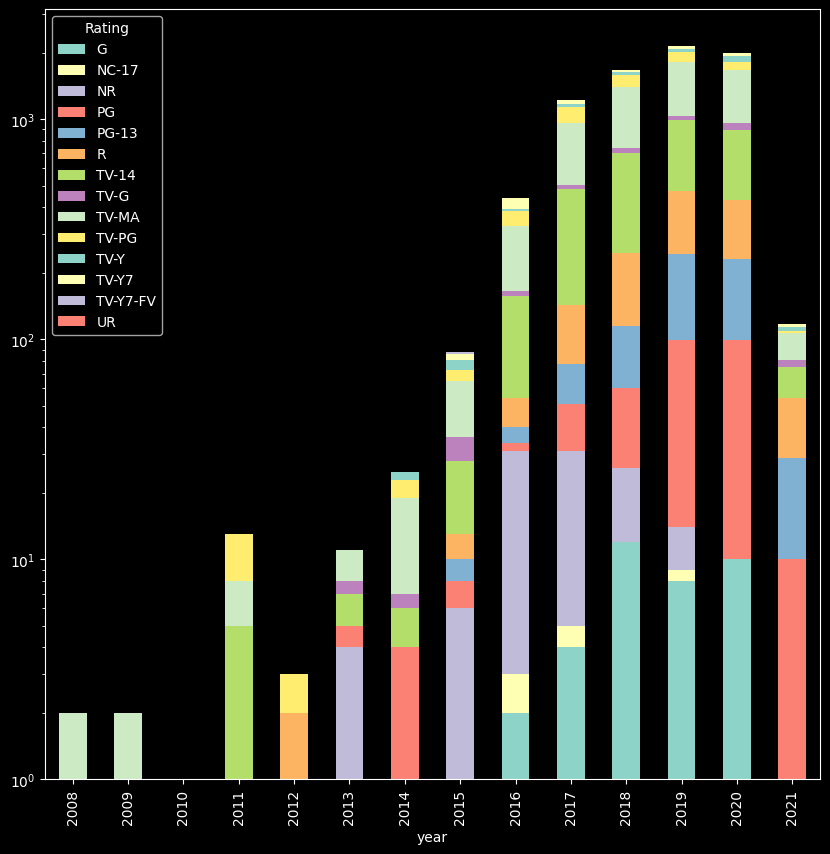

In [120]:
df.groupby('year')['Rating'].value_counts().unstack().plot(kind='bar',stacked=True, figsize=(10,10),log=True)
plt.show()

**Which rating is the most common, and which is the least common?**
* 1.the most common-->TV-MA	(2863)
* 2.the least common-->NC-17 (3)








In [121]:
df['Rating'].value_counts()

,count
Rating,
TV-MA,2861
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194


# Rating by Show Type:

**How are different ratings distributed between movies and TV shows?**

<ipython-input-122-ae6c5397d3cf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Rating'].get_group('Movie').value_counts().plot(kind='bar',figsize=(10,10))


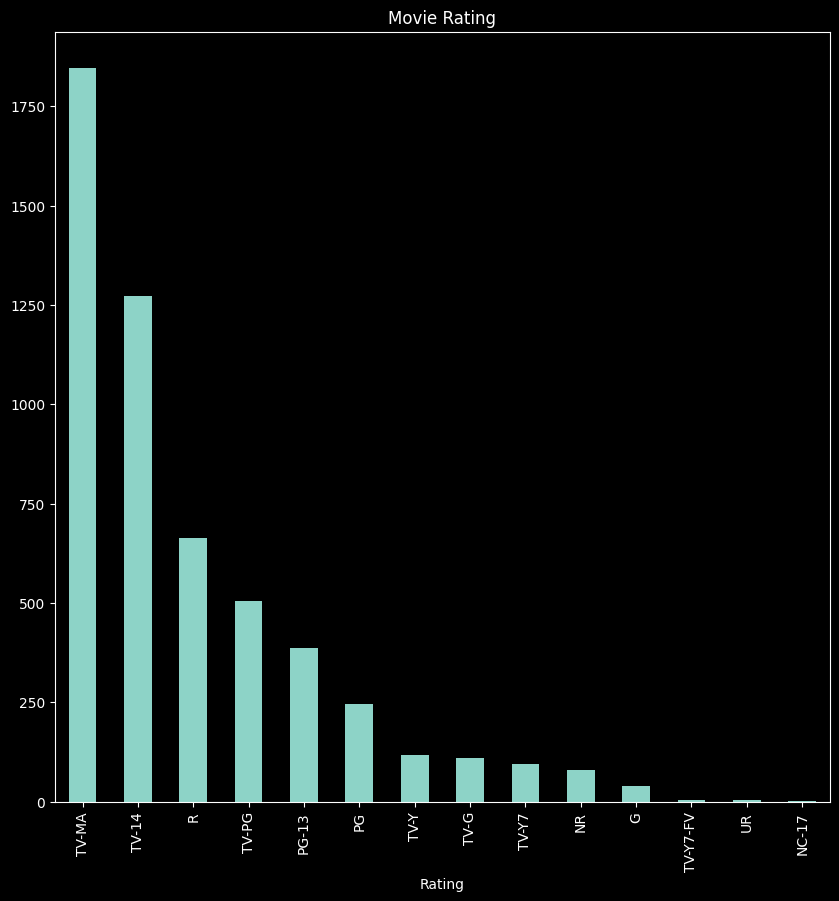

<ipython-input-122-ae6c5397d3cf>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Rating'].get_group('TV Show').value_counts().plot(kind='bar',figsize=(10,10))


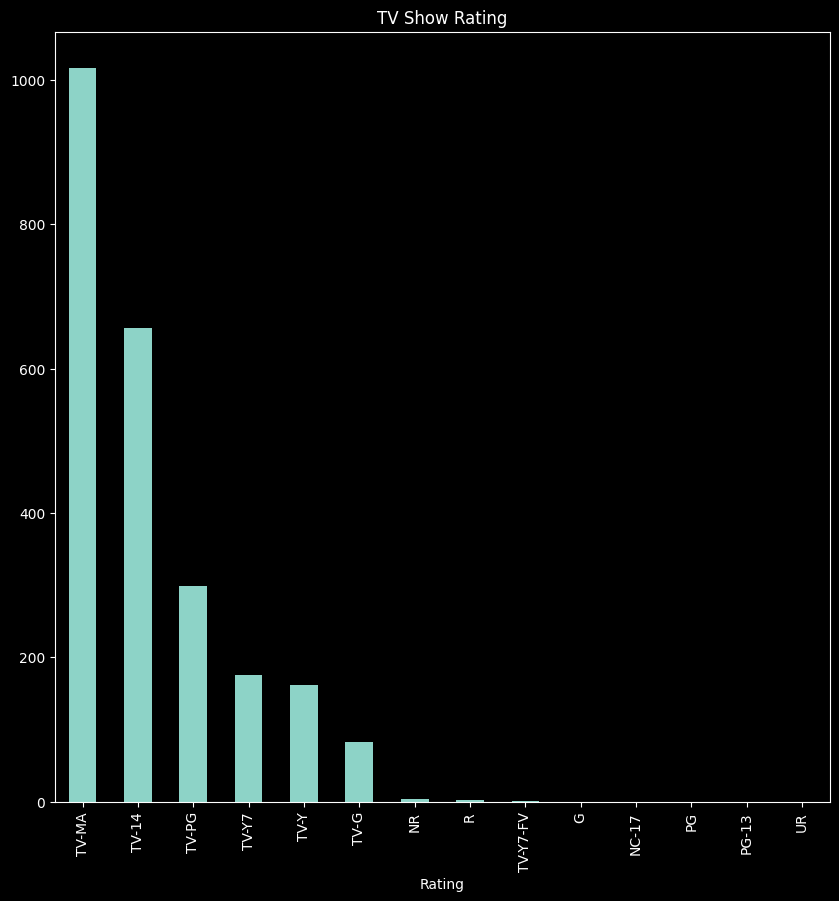

In [122]:
df.groupby('Category')['Rating'].get_group('Movie').value_counts().plot(kind='bar',figsize=(10,10))
plt.title('Movie Rating')
plt.show()
df.groupby('Category')['Rating'].get_group('TV Show').value_counts().plot(kind='bar',figsize=(10,10))
plt.title('TV Show Rating')
plt.show()

**Are certain ratings more common for movies, and others more common for TV shows?**
* TV-MA,TV-14 both are common rating in movies and tv

# Rating by Country:

**Which countries produce the most TV-MA or R rated content**

<ipython-input-123-629f3ab15208>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Rating')['Country'].get_group('TV-MA').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')


<Axes: ylabel='count'>

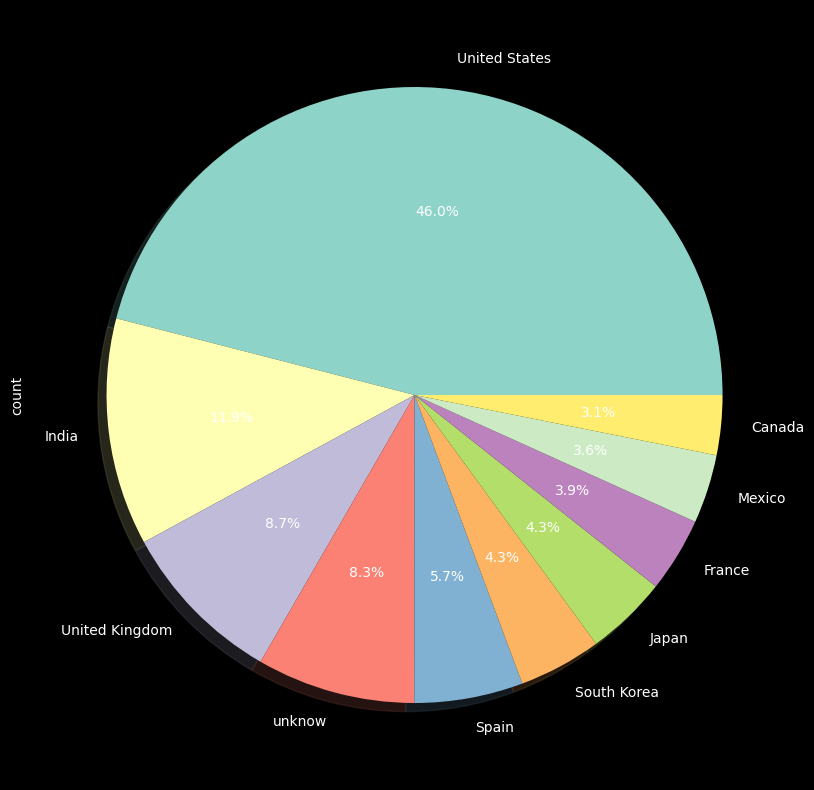

In [123]:
df.groupby('Rating')['Country'].get_group('TV-MA').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')

<ipython-input-124-d480164544ec>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Rating')['Country'].get_group('R').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')


<Axes: ylabel='count'>

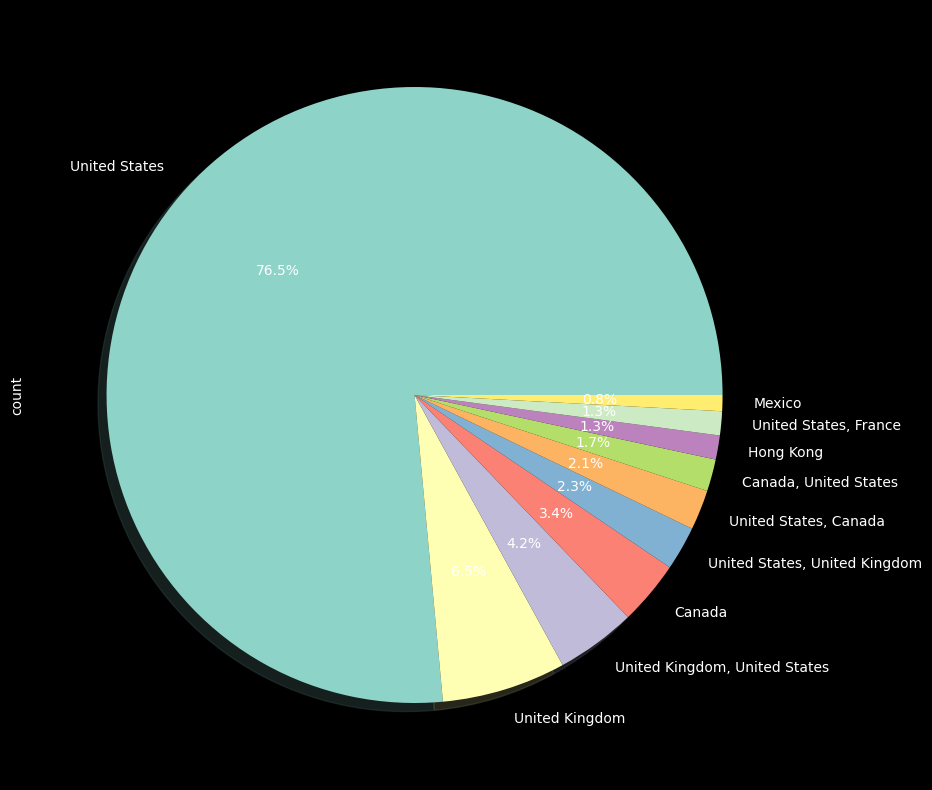

In [124]:
df.groupby('Rating')['Country'].get_group('R').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')

In [125]:
x=df['Cast'].str.split(',').values.tolist()


In [126]:
def cast(x):
 y=[]
 for i in x:
    if type(i)==list:
        for j in i:
            if j=='unknow':
              continue
            y.append(j)
    else:
        continue


 return y



# CAST

**actors by most no. of count in cast**

<Axes: ylabel='count'>

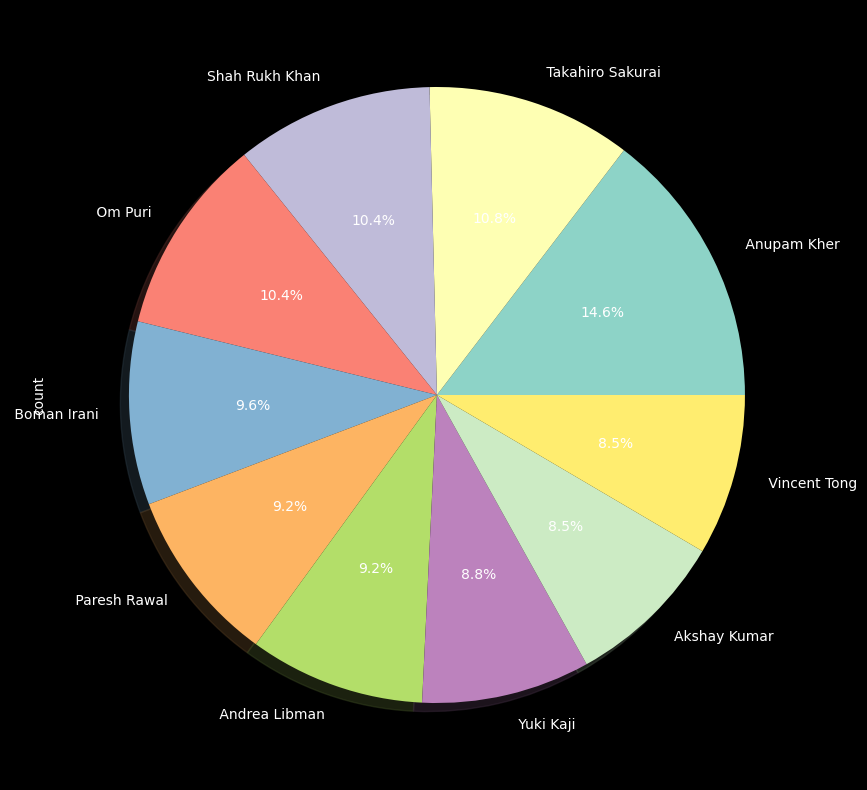

In [127]:
p=cast(x)
p=pd.Series(p)
p.value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')


**top 10 cast in movies**

<ipython-input-128-f0d4c40a1851>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Cast'].get_group('Movie').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')


<Axes: ylabel='count'>

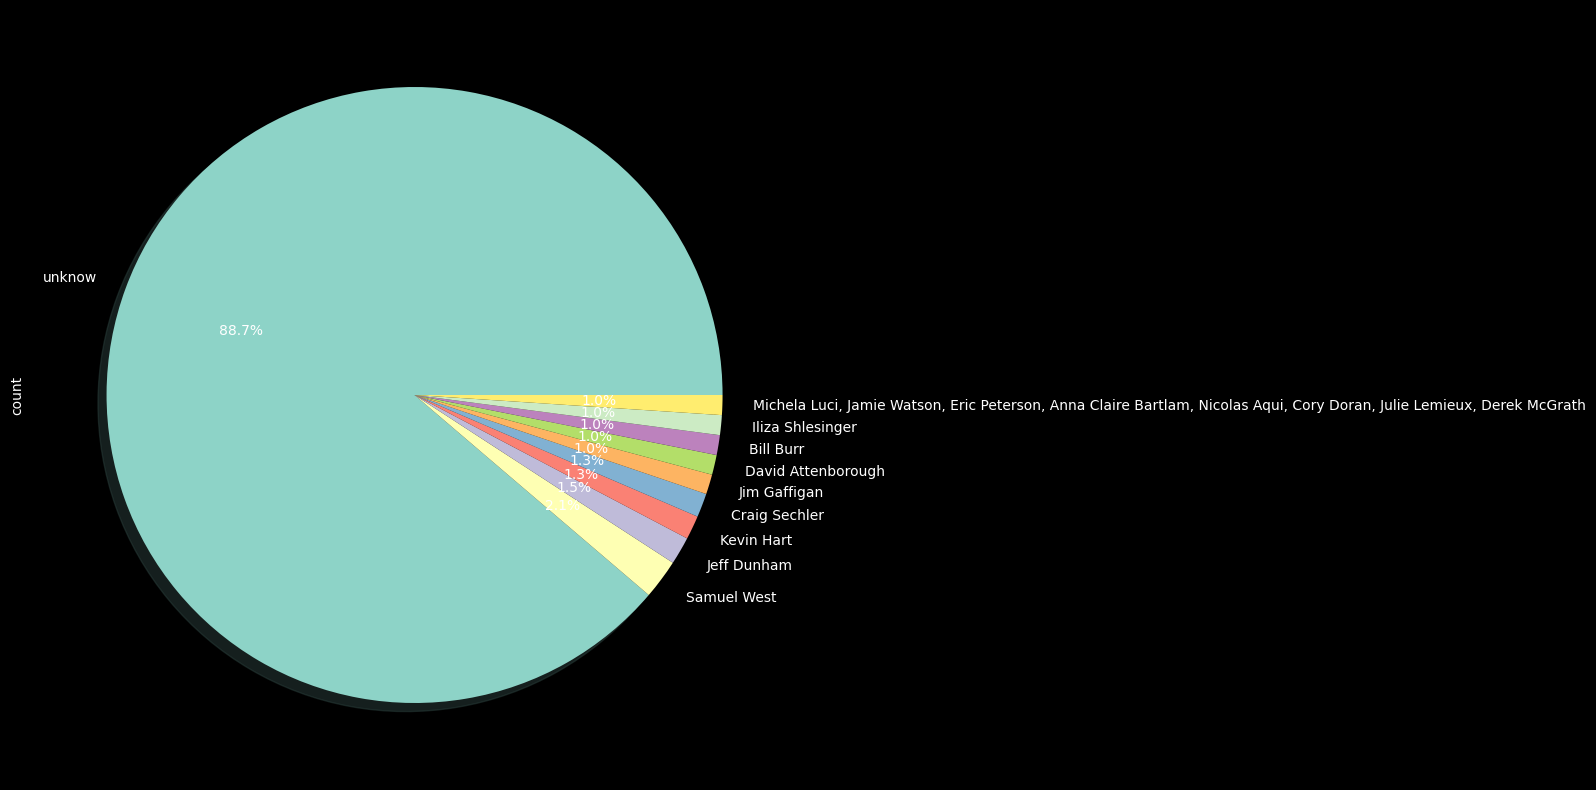

In [128]:
df.groupby('Category')['Cast'].get_group('Movie').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')

**top 10 cast in Tv show**

<ipython-input-129-e809da71e48e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Cast'].get_group('TV Show').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')


<Axes: ylabel='count'>

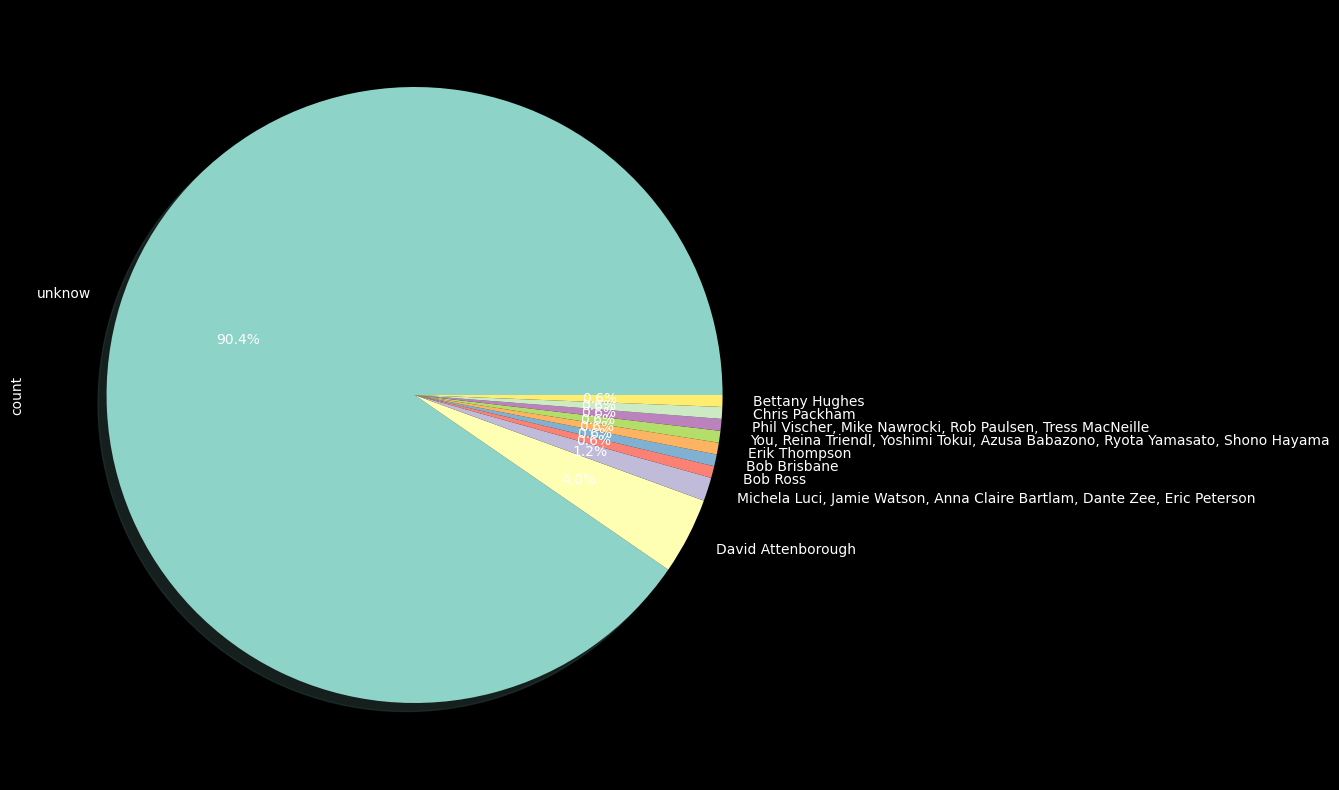

In [129]:
df.groupby('Category')['Cast'].get_group('TV Show').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')

In [130]:
x=df.groupby('Country')['Cast'].get_group('India').str.split(',').tolist()#.head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')

<Axes: ylabel='count'>

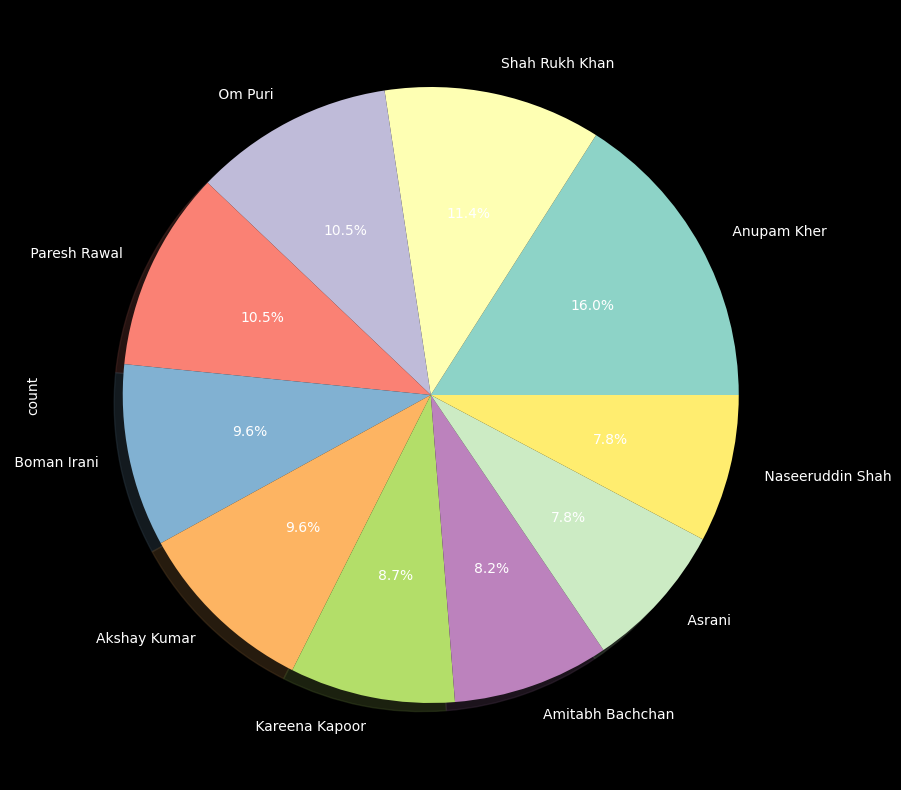

In [131]:
pd.Series(cast(x)).value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')

#Director

<Axes: xlabel='Director'>

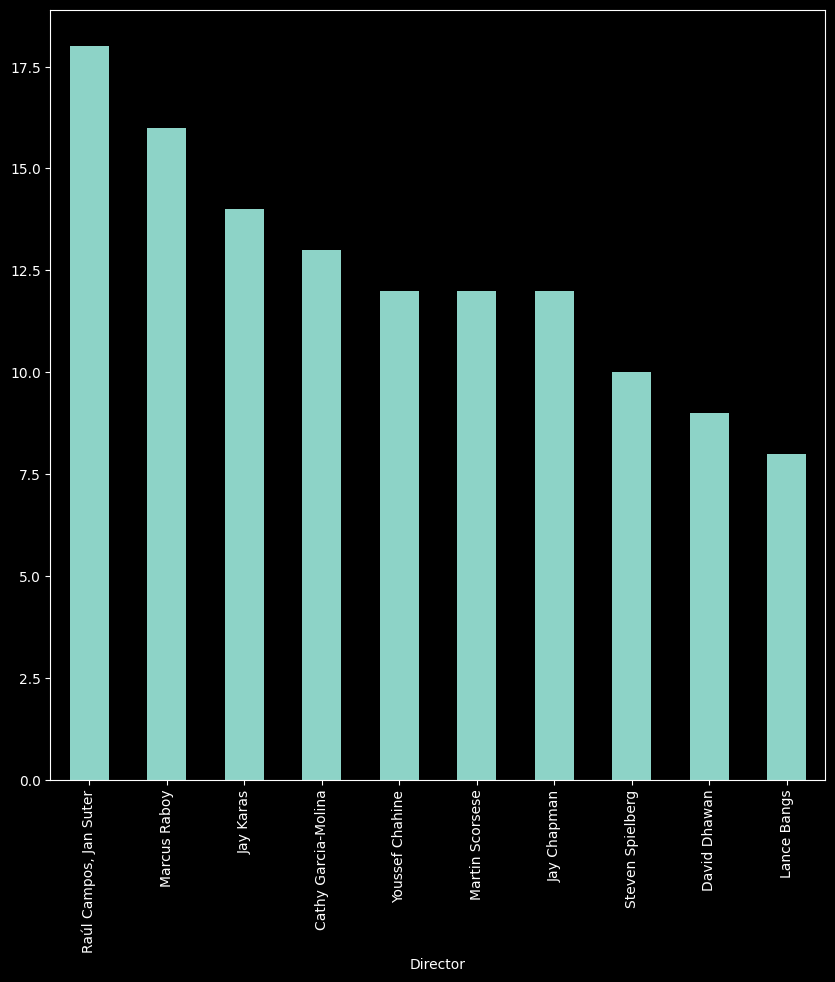

In [132]:
df.loc[df['Director']!='unknow','Director'].value_counts().head(10).plot(kind='bar',figsize=(10,10))

**top 10 director in india**

<Axes: xlabel='Director'>

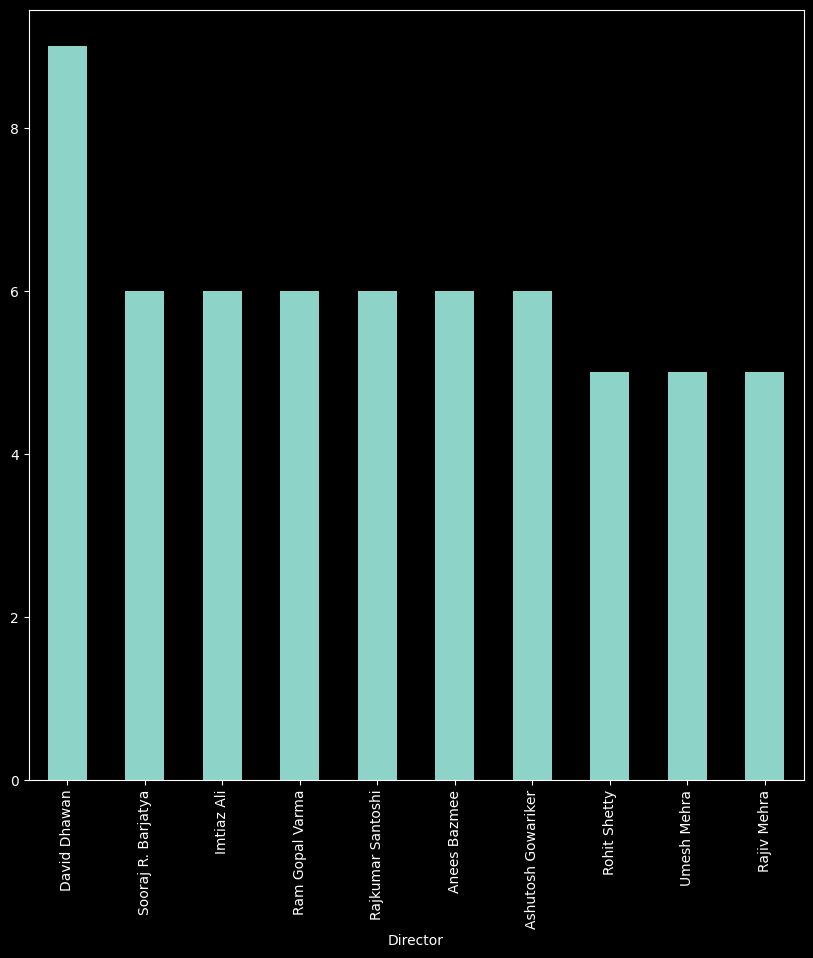

In [133]:
df.groupby('Country')['Director'].get_group('India').loc[df.groupby('Country')['Director'].get_group('India')!='unknow'].value_counts().head(10).plot(kind='bar',figsize=(10,10))

#*day month year*

**ferecny count of days on which movie is released**

<Axes: xlabel='day'>

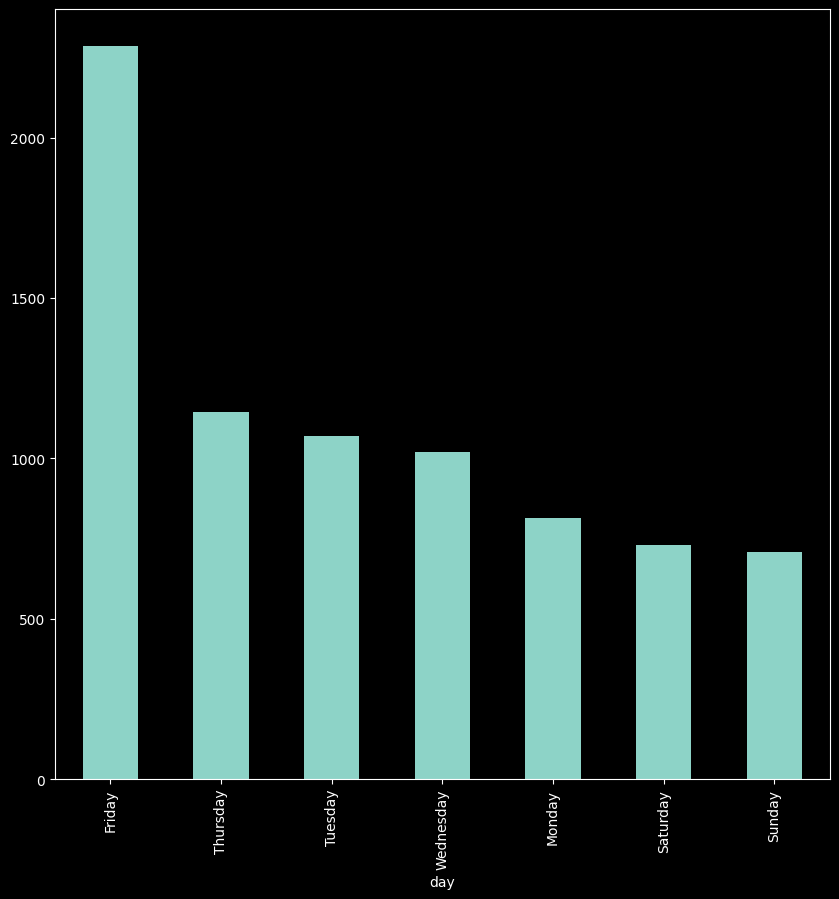

In [134]:
df['day'].value_counts().plot(kind='bar',stacked=True,figsize=(10,10))

<Axes: xlabel='month'>

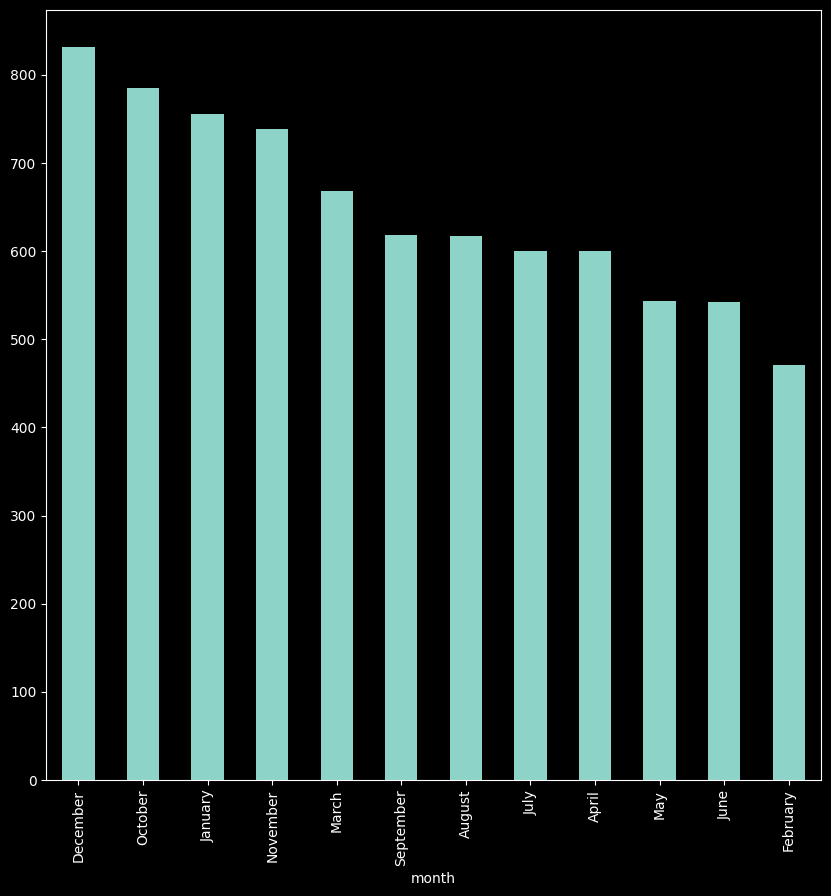

In [135]:
df['month'].value_counts().plot(kind='bar',stacked=True,figsize=(10,10))

<Axes: xlabel='year'>

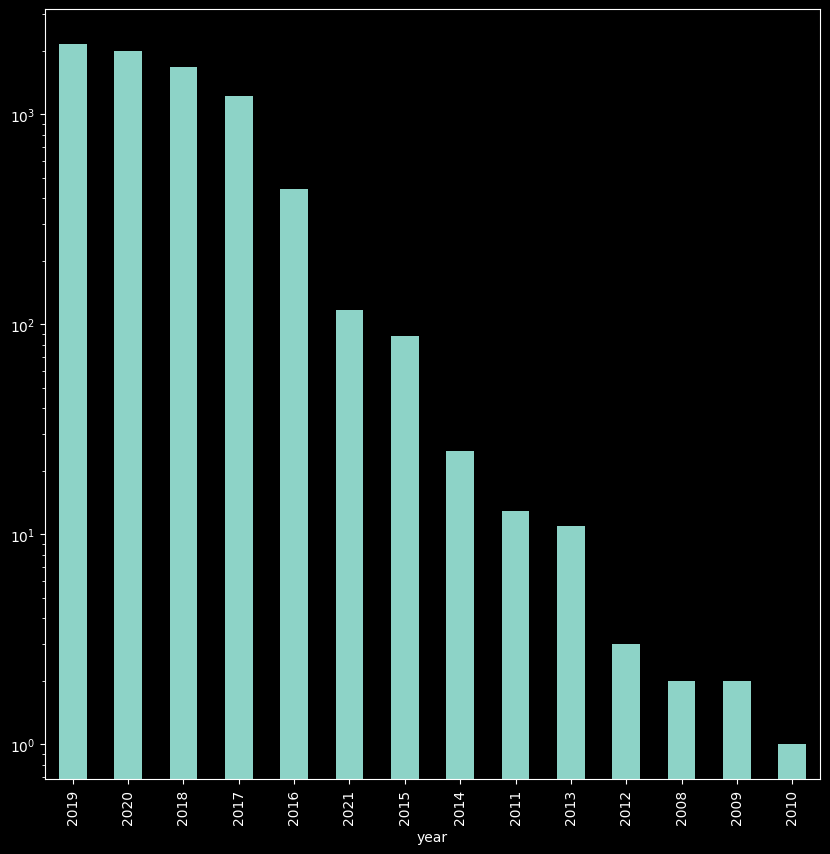

In [136]:
df['year'].value_counts().plot(kind='bar',stacked=True,figsize=(10,10),log=True)

<Axes: xlabel='year'>

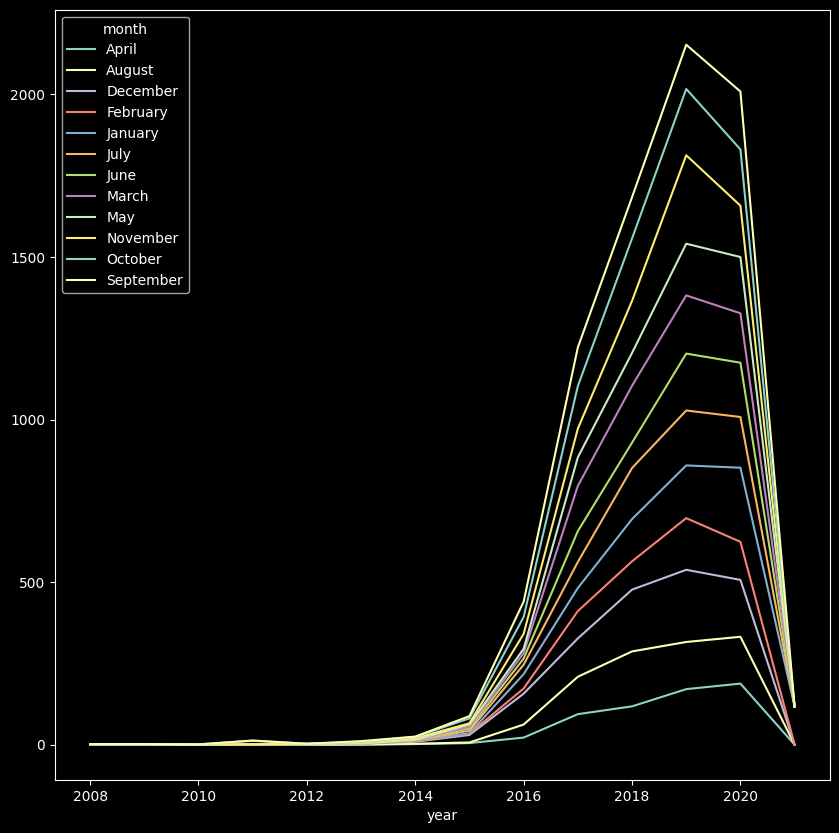

In [137]:
df.groupby('year')['month'].value_counts().unstack().plot(kind='line',stacked=True,figsize=(10,10))

**trend of r rated movies with time**

<Axes: xlabel='year,month_no.'>

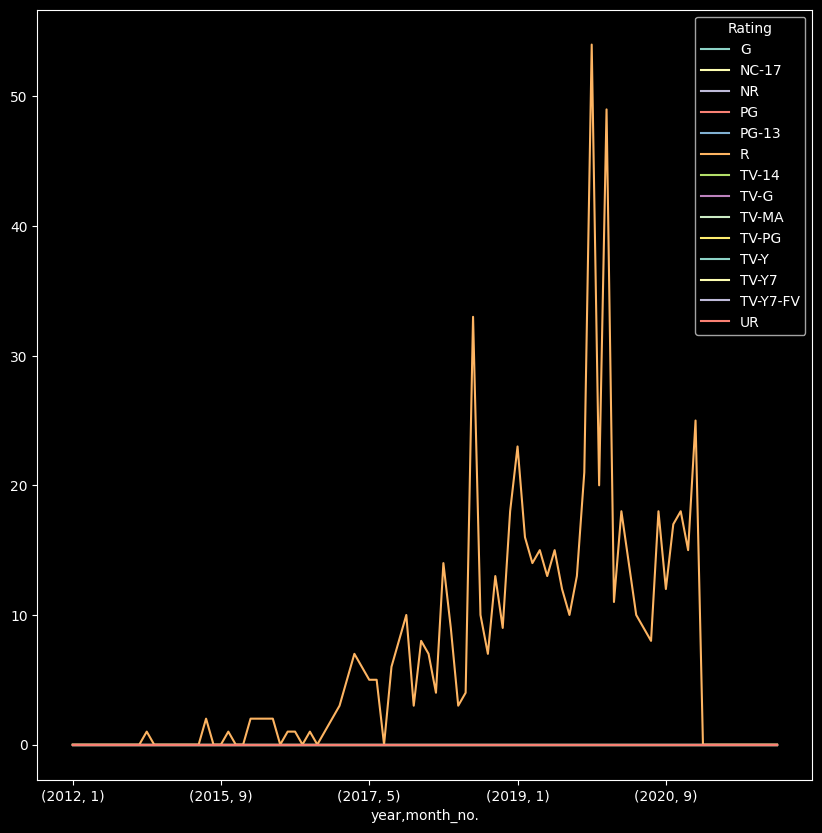

In [138]:
x=df.loc[df['Rating']=='R']
x.groupby(['year','month_no.'])['Rating'].value_counts().unstack().plot(kind='line',figsize=(10,10))

#Genres

**top 10 Genres**

<Axes: ylabel='count'>

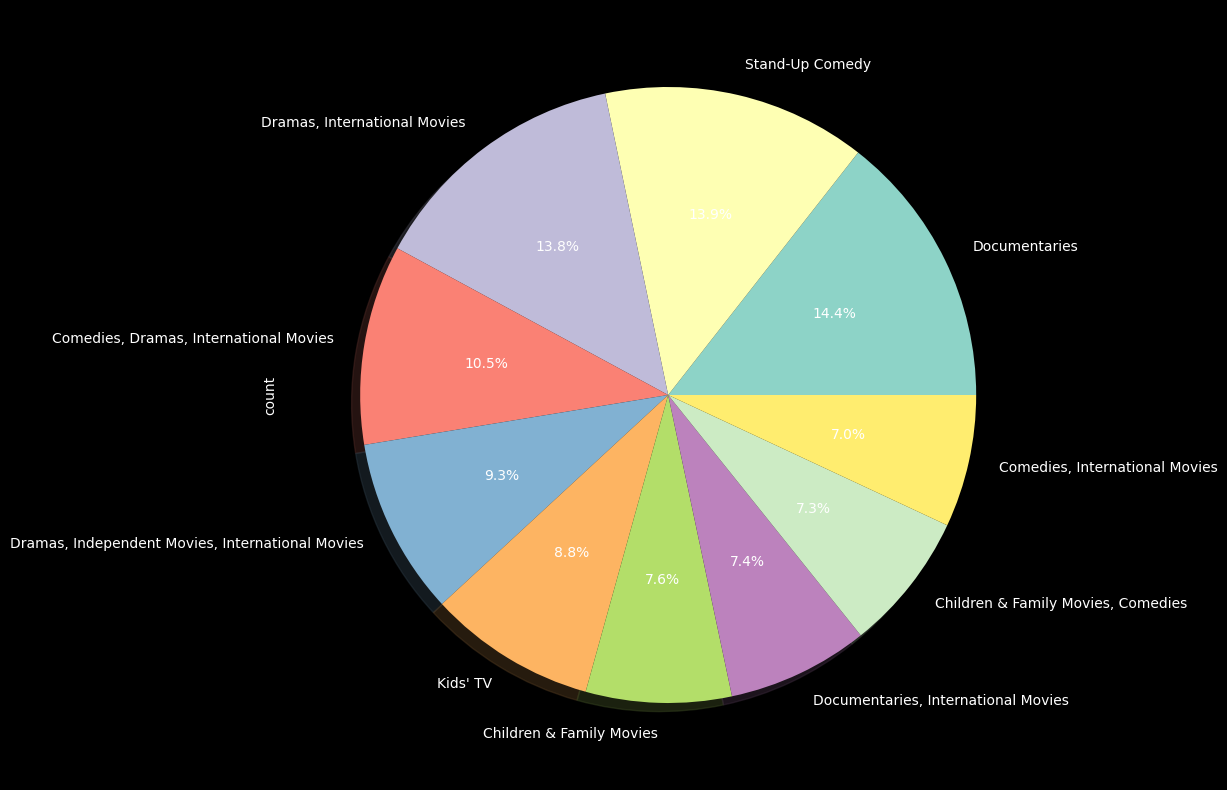

In [139]:
df['Type'].value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')

<Axes: ylabel='count'>

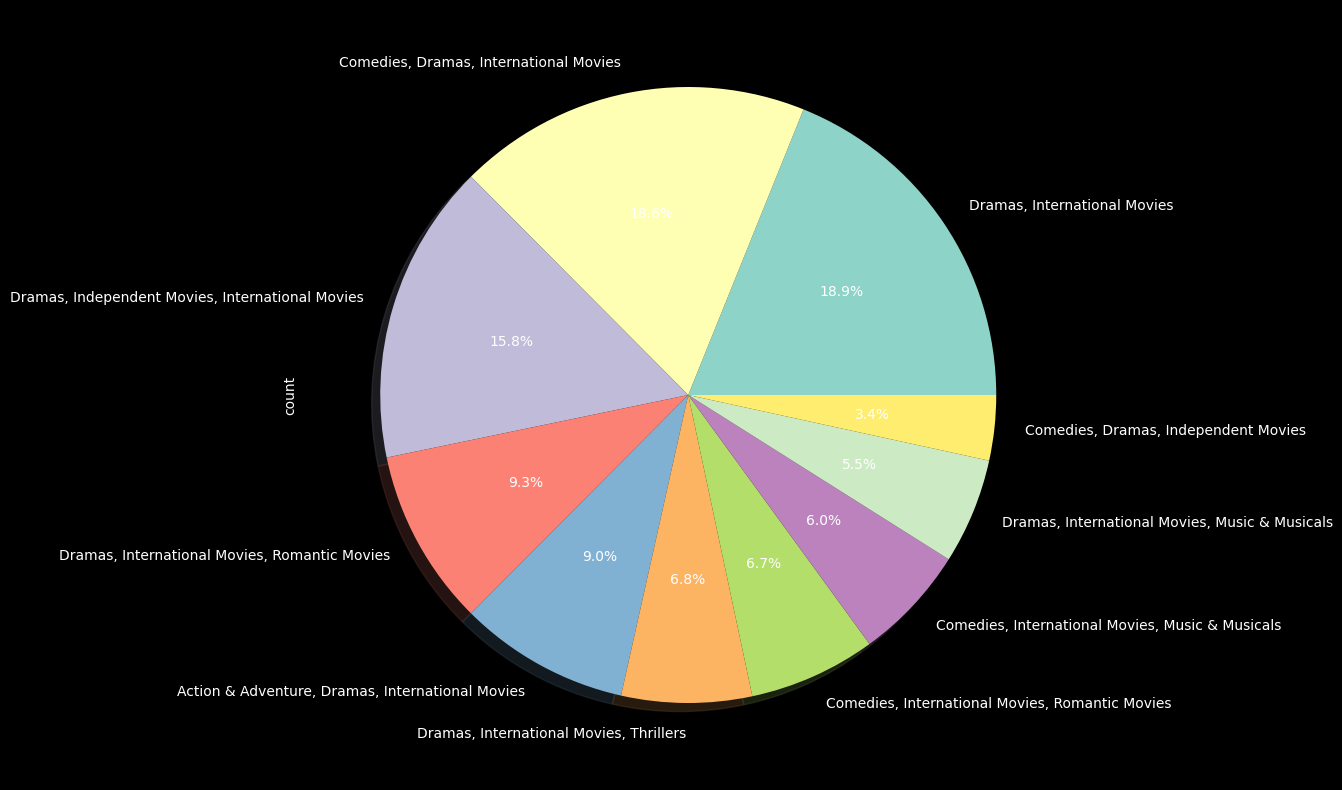

In [140]:
df.groupby('Country').get_group('India')['Type'].value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')

#Duration

In [142]:
df.groupby('Category')['Duration'].get_group('Movie').str.replace(' min','').astype(int).describe()

<ipython-input-142-7ceab6a7281a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Duration'].get_group('Movie').str.replace(' min','').astype(int).describe()


,Duration
count,5372.000000
mean,99.330417
std,28.524206
min,3.000000
25%,86.000000
50%,98.000000
75%,114.000000
max,312.000000


**showing average duration of movie,25%,50% and 75% of movie**

<ipython-input-143-a74a76c414c1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Duration'].get_group('Movie').str.replace(' min','').astype(int).to_frame().boxplot()


<Axes: >

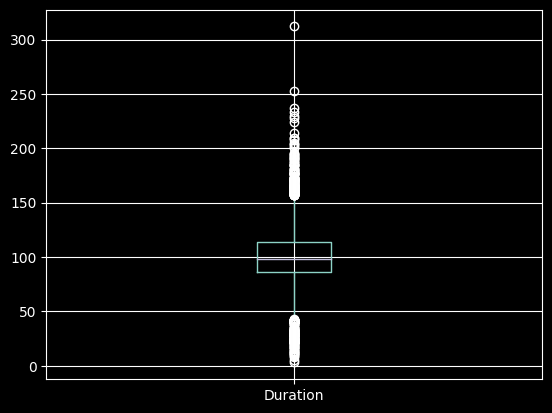

In [143]:
# Convert the Series to a DataFrame.
df.groupby('Category')['Duration'].get_group('Movie').str.replace(' min','').astype(int).to_frame().boxplot()

<ipython-input-144-b638469dc3e6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Duration'].get_group('Movie').str.replace(' min','').astype(int).plot(kind='hist',figsize=(10,10))


<Axes: ylabel='Frequency'>

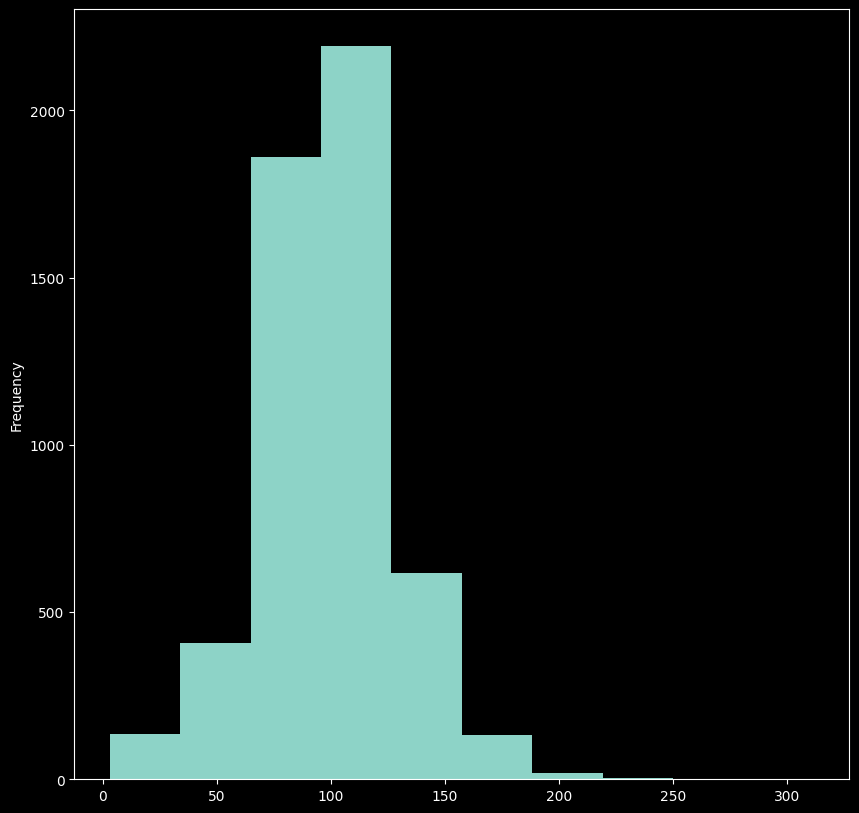

In [144]:
df.groupby('Category')['Duration'].get_group('Movie').str.replace(' min','').astype(int).plot(kind='hist',figsize=(10,10))

**duration of TV shows**

<ipython-input-145-6c3189735852>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Duration'].get_group('TV Show').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')


<Axes: ylabel='count'>

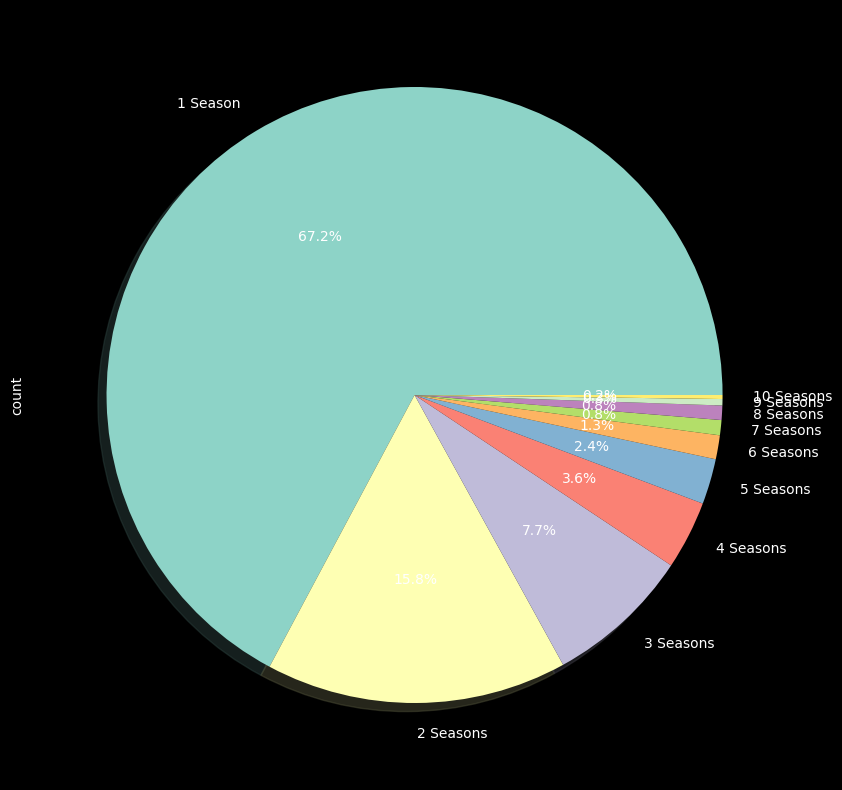

In [145]:
df.groupby('Category')['Duration'].get_group('TV Show').value_counts().head(10).plot(kind='pie',figsize=(10,10),shadow=True,autopct='%1.1f%%')